Copyright 2021 Abbrivia GmbH CC-BY (By Attribution) 4.0 https://creativecommons.org/licenses/by/4.0/legalcode

In [110]:
import pandas as pd
import plotly.express as px
from sklearn import linear_model
# we can render charts to static images (png)
#import plotly.io as pio
#pio.renderers.default = "png"

# Getting the Data

The data is taken from Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al. A global database of COVID-19 vaccinations. Nat Hum Behav (2021)
https://ourworldindata.org/covid-vaccinations https://covid.ourworldindata.org/data/owid-covid-data.xlsx
We use Excel because it contains the data format information in itself. If you want to run this more often consider manually downloading the data and sourcing it locally as shown in the next line (commented out).

In [2]:
d=pd.read_excel('https://covid.ourworldindata.org/data/owid-covid-data.xlsx')

In [57]:
#d=pd.read_excel('owid-covid-data.xlsx')

# Let's see what is in the dataset

In [4]:
d.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
d[['excess_mortality','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',]].describe()

excess_mortality  total_vaccinations_per_hundred  \
count       5206.000000                    37982.000000   
mean          16.132134                       59.809366   
std           31.168332                       55.314374   
min          -95.920000                        0.000000   
25%           -0.620000                        8.582500   
50%            7.135000                       44.345000   
75%           22.620000                      104.220000   
max          374.200000                      321.000000   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
count                   36490.000000                         33680.000000   
mean                       33.245154                            27.172397   
std                        27.380597                            25.620514   
min                         0.000000                             0.000000   
25%                         6.250000                             3.427500   
50%                        28.820000                            19.165000   
75%                        58.000000                            48.980000   
max                       122.180000                           118.860000   

       total_boosters_per_hundred  
count                11387.000000  
mean                     4.813813  
std                      9.323947  
min                      0.000000  
25%                      0.000000  
50%                      0.250000  
75%                      4.895000  
max                     79.960000

# pandas.DataFrame.corr
Compute pairwise correlation of columns, **excluding NA/null values**.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://www.iban.com/country-codes

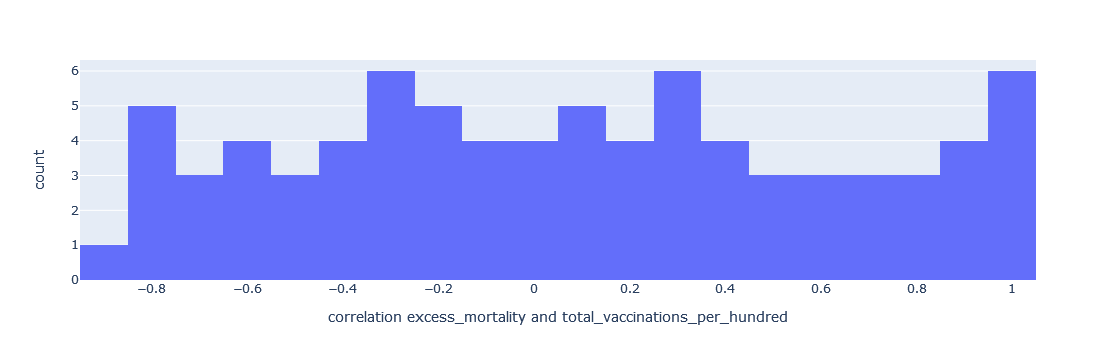

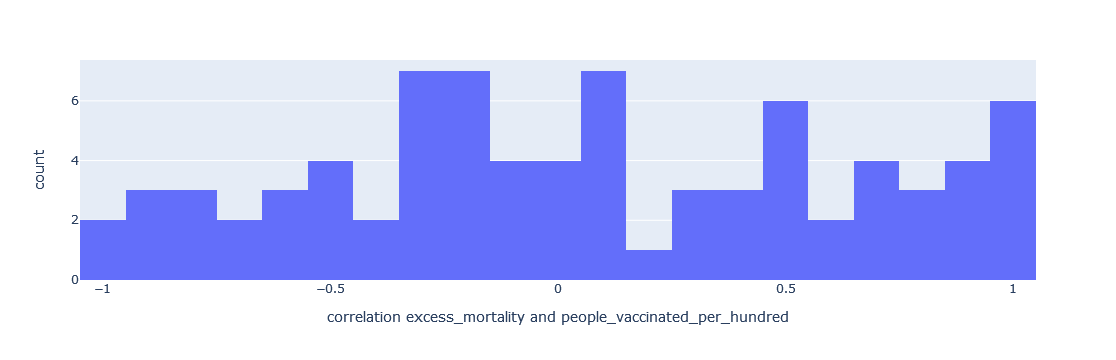

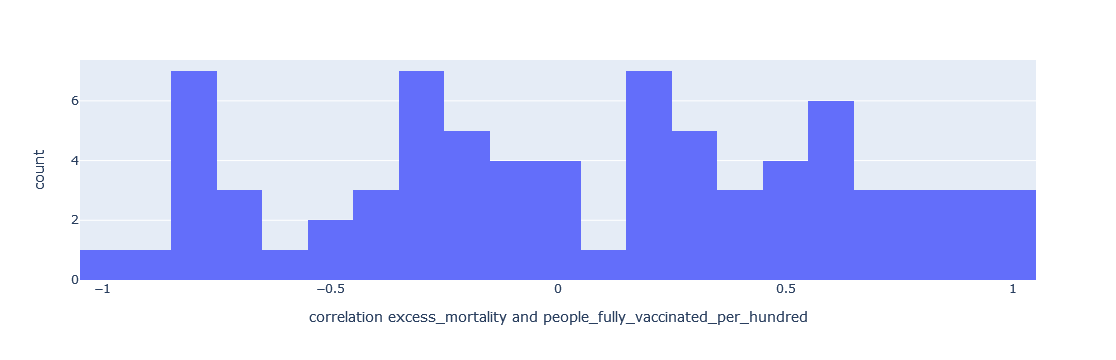

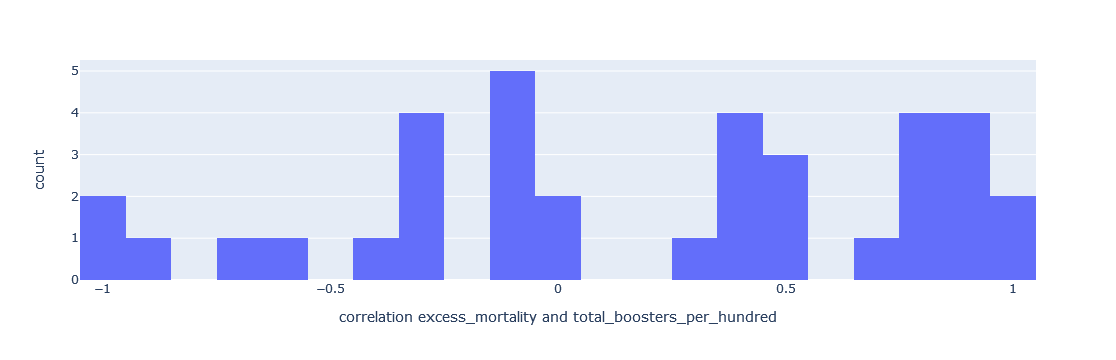

In [6]:
#pd.set_option('display.max_rows', None)
for metric in ['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',]:
    country_corr=d.groupby('iso_code')[['excess_mortality', metric]].corr().unstack().iloc[:,1].reset_index()
    country_corr.columns=['iso_code','correlation excess_mortality and '+metric]
    px.histogram(country_corr, x='correlation excess_mortality and '+metric, nbins=30,).show()

# It is surprising that there are so many countries with very high positive correlation of excess mortality and various vaccination metrics over time.
Overal the correlation values are all over the [-1,1] interval so it is not clear what is their relationship.

The distribution is similar for all four vaccination metrics although (as expected) the number of countries we can calculate correlation is decreasing with higher level of specificity and vaccination step.

# So let's see what countries are in the dataset and what are actual correlation values?
Lets look at **total_vaccinations_per_hundred** because it has the most data available as we saw in above in dataframe describe() results.

In [7]:
pd.set_option('display.max_rows', None)
country_corr=d.groupby('iso_code')[['excess_mortality','total_vaccinations_per_hundred']].corr().unstack().iloc[:,1].reset_index()
country_corr.columns=['iso_code','correlation excess_mortality and total_vaccinations_per_hundred']
country_corr[~country_corr['correlation excess_mortality and total_vaccinations_per_hundred'].isna()].sort_values(
        'correlation excess_mortality and total_vaccinations_per_hundred',ascending=False
    )

iso_code  correlation excess_mortality and total_vaccinations_per_hundred
8         ARM                                           1.000000              
152       OMN                                           1.000000              
81        GRL                                           1.000000              
225       UZB                                           0.999957              
82        GTM                                           0.965872              
160  OWID_KOS                                           0.965482              
182       RUS                                           0.938034              
148       NOR                                           0.895107              
140       MYS                                           0.862776              
54        DNK                                           0.860464              
71        GEO                                           0.826510              
63        FIN                                           0.783782              
187       SGP                                           0.783283              
134       MNG                                           0.736974              
108       KOR                                           0.726402              
102       KAZ                                           0.689450              
172       PHL                                           0.644586              
195       SRB                                           0.587946              
79        GRC                                           0.583481              
11        AUT                                           0.546910              
14        BEL                                           0.534626              
120       LVA                                           0.472899              
84        HKG                                           0.442201              
19        BGR                                           0.429502              
12        AZE                                           0.401630              
101       JPN                                           0.382192              
181       ROU                                           0.321411              
49        CYP                                           0.309493              
118       LTU                                           0.296412              
0         ABW                                           0.291792              
222       UKR                                           0.291080              
61        EST                                           0.272986              
51        DEU                                           0.197256              
92        IRL                                           0.178375              
119       LUX                                           0.168158              
219       TWN                                           0.150555              
60        ESP                                           0.144421              
129       MKD                                           0.136286              
34        CHE                                           0.080393              
201       SWE                                           0.079355              
96        ISR                                           0.063114              
209       THA                                           0.045590              
200       SVN                                           0.021154              
88        HUN                                          -0.014416              
42        COL                                          -0.026602              
70        GBR                                          -0.099850              
131       MLT                                          -0.103203              
176       PRT                                          -0.135915              
175       POL                                          -0.143936              
26        BOL                                          

# Data Exploration to Exclude Meaningless Datapoints
We need to make some very basic decisions as to which countries to include into our analysis. Some do not have enough meaningful data. 

So first we only keep countries where the correlation can be calculated at all (at least some mutual data points present).

Then we exclude rows with no excess mortality data at all and visualize the data.
         

In [8]:
countries_worth_looking_at=list(
    country_corr[~country_corr['correlation excess_mortality and total_vaccinations_per_hundred'].isna()].sort_values(
        'correlation excess_mortality and total_vaccinations_per_hundred',ascending=False
    )['iso_code']
)

In [9]:
print(countries_worth_looking_at)

['ARM', 'OMN', 'GRL', 'UZB', 'GTM', 'OWID_KOS', 'RUS', 'NOR', 'MYS', 'DNK', 'GEO', 'FIN', 'SGP', 'MNG', 'KOR', 'KAZ', 'PHL', 'SRB', 'GRC', 'AUT', 'BEL', 'LVA', 'HKG', 'BGR', 'AZE', 'JPN', 'ROU', 'CYP', 'LTU', 'ABW', 'UKR', 'EST', 'DEU', 'IRL', 'LUX', 'TWN', 'ESP', 'MKD', 'CHE', 'SWE', 'ISR', 'THA', 'SVN', 'HUN', 'COL', 'GBR', 'MLT', 'PRT', 'POL', 'BOL', 'MEX', 'MAC', 'ALB', 'FRO', 'URY', 'FRA', 'USA', 'BRB', 'CAN', 'NZL', 'ITA', 'ZAF', 'MNE', 'MDA', 'LIE', 'SVK', 'HRV', 'KGZ', 'PRY', 'LBN', 'CHL', 'AUS', 'QAT', 'BRA', 'PER', 'PAN', 'SMR', 'ECU', 'CZE', 'IRN']


In [10]:
df=d[ (~d['excess_mortality'].isnull()) & (d['iso_code'].isin(countries_worth_looking_at)) ]

What we will see is that the total_vaccinations_per_hundred data is not contigious but at least it is monotonous as one should expect. It may be helpful to fill the blanks with some polinomial approximation.

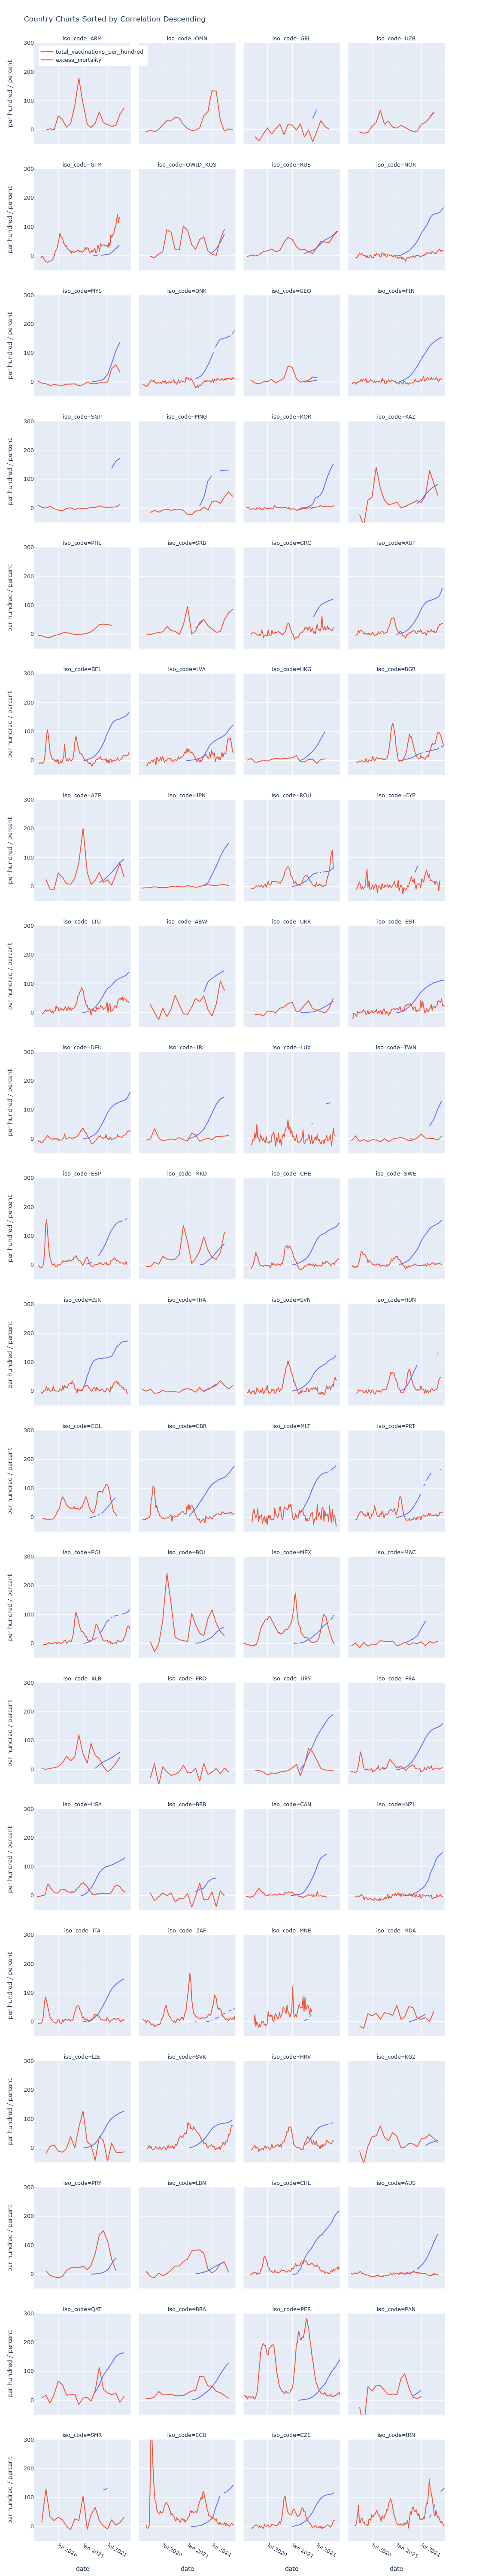

In [11]:
fig = px.line(df,    
              x='date',
              y=['total_vaccinations_per_hundred','excess_mortality'],
              facet_col='iso_code', 
              category_orders={'iso_code':countries_worth_looking_at},
              facet_col_wrap=4,
              facet_row_spacing=0.01,
              height=6000, width=800,
              labels={
                  "value": "per hundred / percent",
                  "variable": "",
              },
              title="Country Charts Sorted by Correlation Descending",
             )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.999,
    xanchor="left",
    x=0.01
))   
fig.update_yaxes(range=[-50, 300])
fig.show()

Lets exclude ['ARM','FRO','OMN','PHL']

In [12]:
for country in ['ARM','FRO','OMN','PHL']: countries_worth_looking_at.remove(country)

In [13]:
df=d[ (~d['excess_mortality'].isnull()) & (d['iso_code'].isin(countries_worth_looking_at)) ]

As expected the data on "fully" vaccinated is less availabe and we would have to exclude 'SMR','LUX' at least. So let's stick to total_vaccinations_per_hundred, in theory every vaccination should be helpful. 

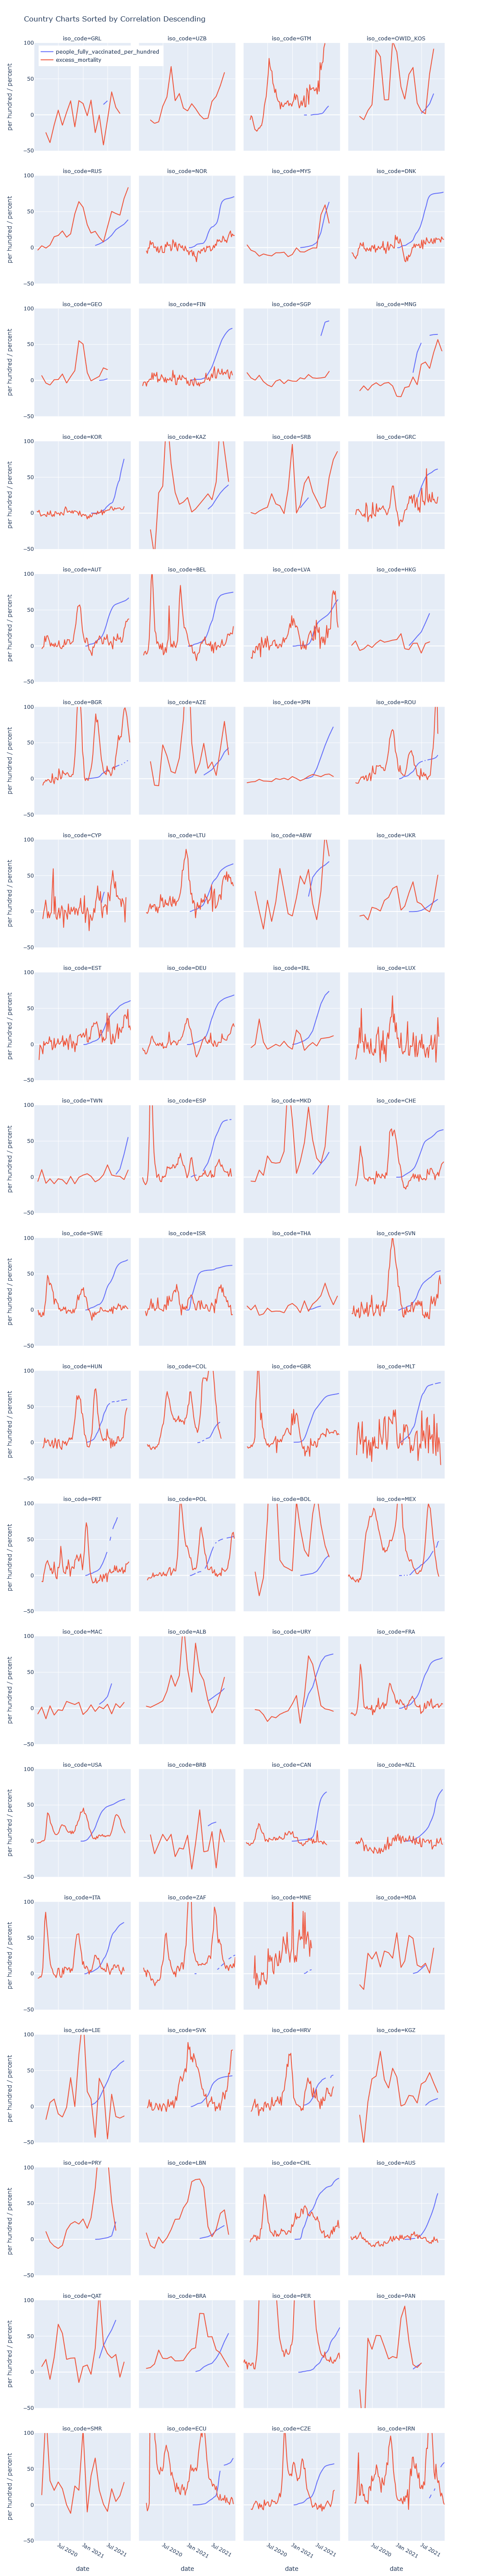

In [14]:
fig = px.line(df,    
              x='date',
              y=['people_fully_vaccinated_per_hundred','excess_mortality'],
              facet_col='iso_code', 
              category_orders={'iso_code':countries_worth_looking_at},
              facet_col_wrap=4,
              facet_row_spacing=0.01,
              height=6000, width=800,
              labels={
                  "value": "per hundred / percent",
                  "variable": "",
              },
              title="Country Charts Sorted by Correlation Descending",
             )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.999,
    xanchor="left",
    x=0.01
))   
fig.update_yaxes(range=[-50, 100])
fig.show()

# What data is actually used to calculate the correllation?
Only the data points where both excess_mortality AND total_vaccinations_per_hundred is present can be used to calculate the correlation. The data looks quite different from this angle.

We re-run the same charting code but just throw away rows where d['total_vaccinations_per_hundred'].isnull().

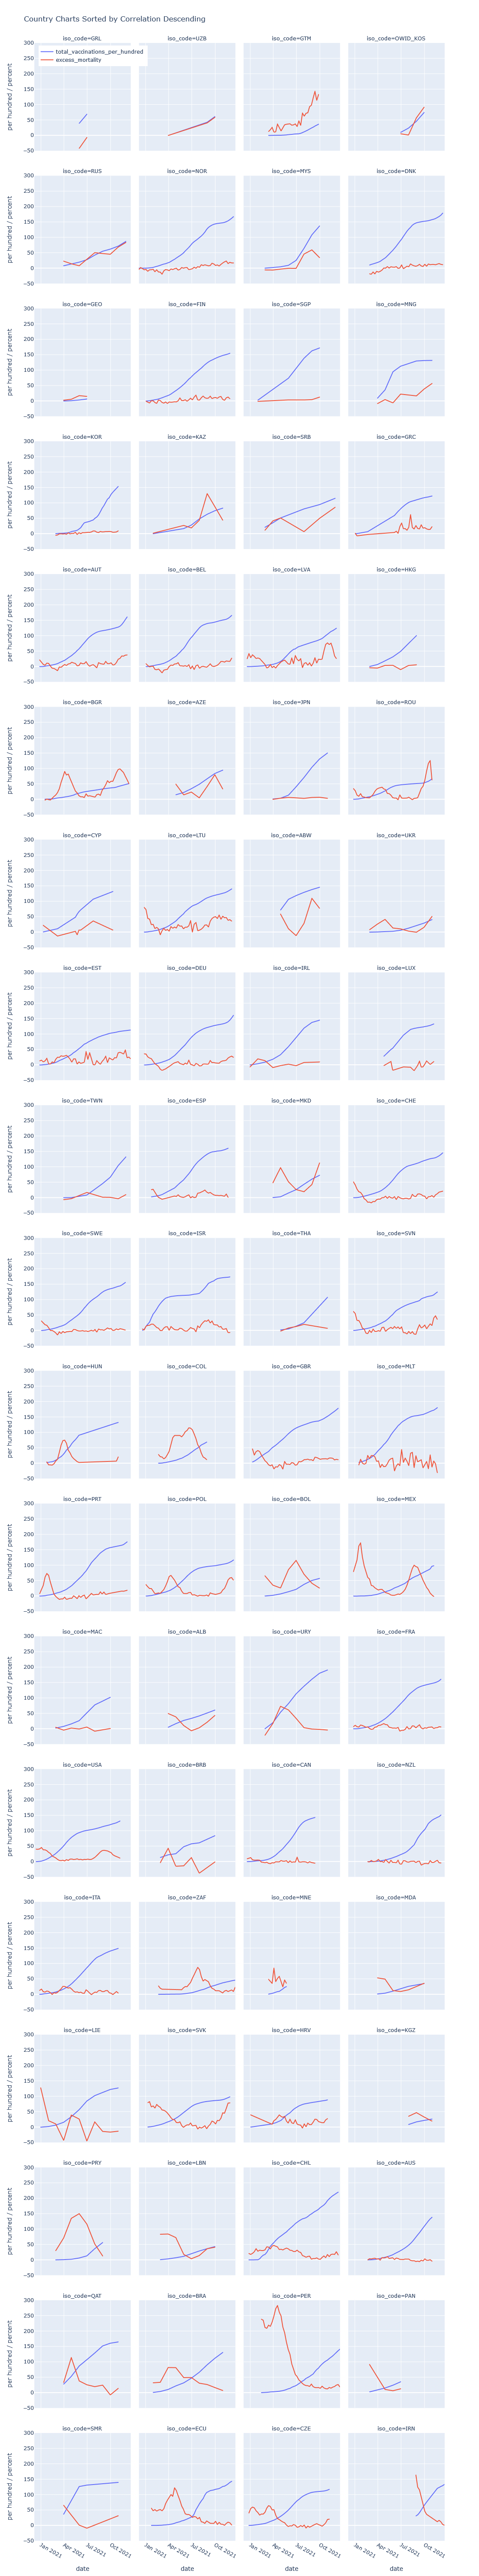

In [15]:
dfc=d[ (~d['excess_mortality'].isnull()) & (d['iso_code'].isin(countries_worth_looking_at)) & (~d['total_vaccinations_per_hundred'].isnull())]
fig = px.line(dfc,    
              x='date',
              y=['total_vaccinations_per_hundred','excess_mortality'],
              facet_col='iso_code', 
              category_orders={'iso_code':countries_worth_looking_at},
              facet_col_wrap=4,
              facet_row_spacing=0.01,
              height=6000, width=800,
              labels={
                  "value": "per hundred / percent",
                  "variable": "",
              },
              title="Country Charts Sorted by Correlation Descending",              
             )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.999,
    xanchor="left",
    x=0.01
))   
fig.update_yaxes(range=[-50, 300])
fig.show()

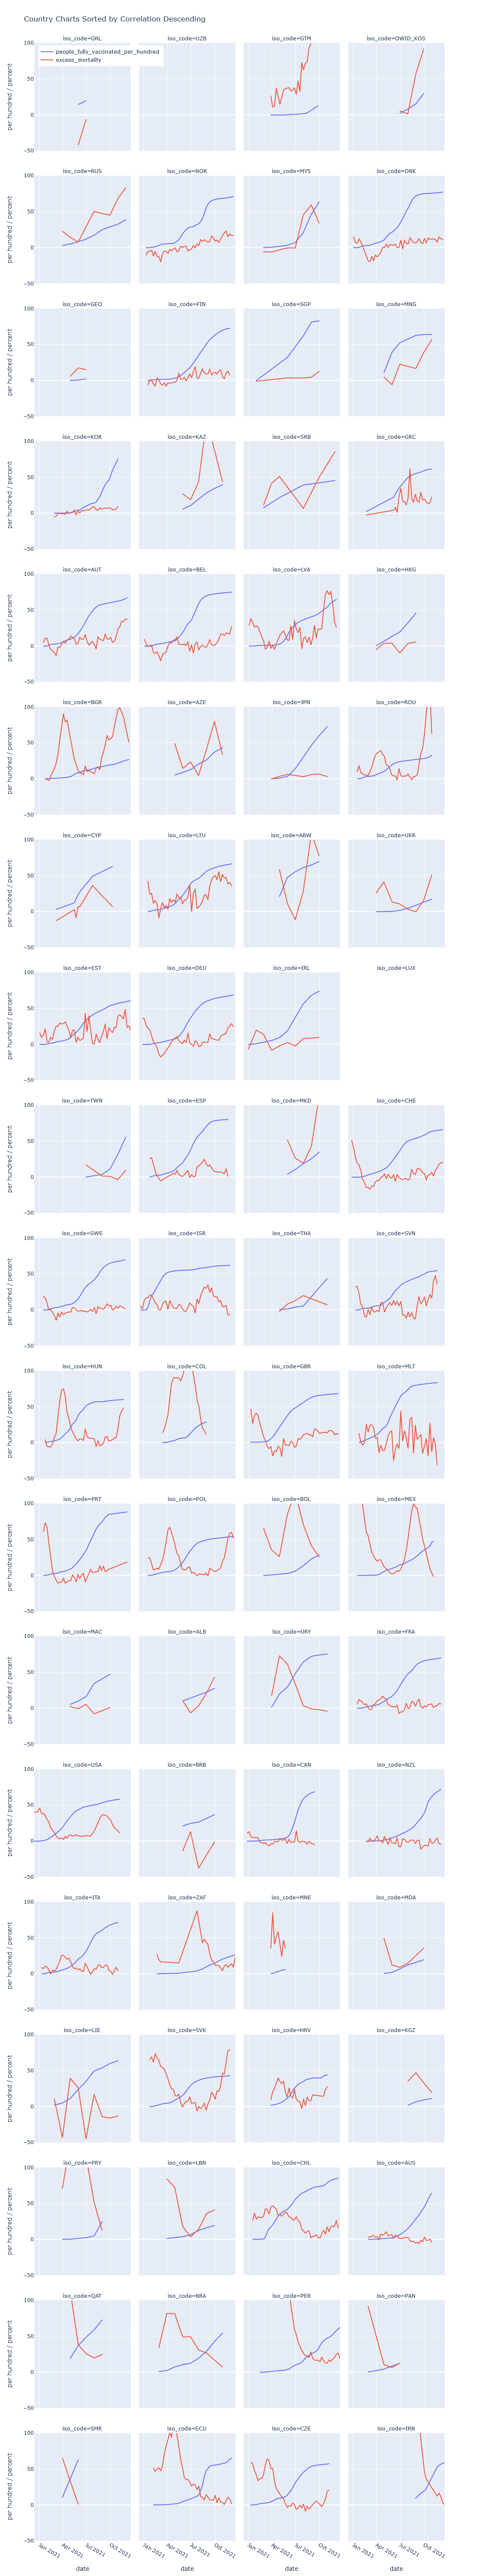

In [16]:
dfc=d[ (~d['excess_mortality'].isnull()) & (d['iso_code'].isin(countries_worth_looking_at)) & (~d['people_fully_vaccinated_per_hundred'].isnull())]
fig = px.line(dfc,    
              x='date',
              y=['people_fully_vaccinated_per_hundred','excess_mortality'],
              facet_col='iso_code', 
              category_orders={'iso_code':countries_worth_looking_at},
              facet_col_wrap=4,
              facet_row_spacing=0.01,
              height=6000, width=800,
              labels={
                  "value": "per hundred / percent",
                  "variable": "",
              },
              title="Country Charts Sorted by Correlation Descending",              
             )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.999,
    xanchor="left",
    x=0.01
))   
fig.update_yaxes(range=[-50, 100])
fig.show()

# Cumulative / Max Values Correlation
Even though we se that the relationship is far from linear let's see how the "final" values are related. We will take the cumulative data column that is more suitable for this calculation and the maximal vaccination value. To not to skew due to later values of either vaccination nor excess_mortality, let's limit dataset to the rows where both are present. As the number of vaccinations is naturally not decreasing we will use it to find the latest row.

In [42]:
df_max=d[(~d['excess_mortality_cumulative_per_million'].isnull()) & (~d['total_vaccinations_per_hundred'].isnull()
          & (d['iso_code'].isin(countries_worth_looking_at)) )
        ].loc[df.groupby(['iso_code'])['total_vaccinations_per_hundred'].idxmax()] 

## Scatter Chart 
max excess_mortality_cumulative_per_million and max total_vaccinations_per_hundred (max values per country).

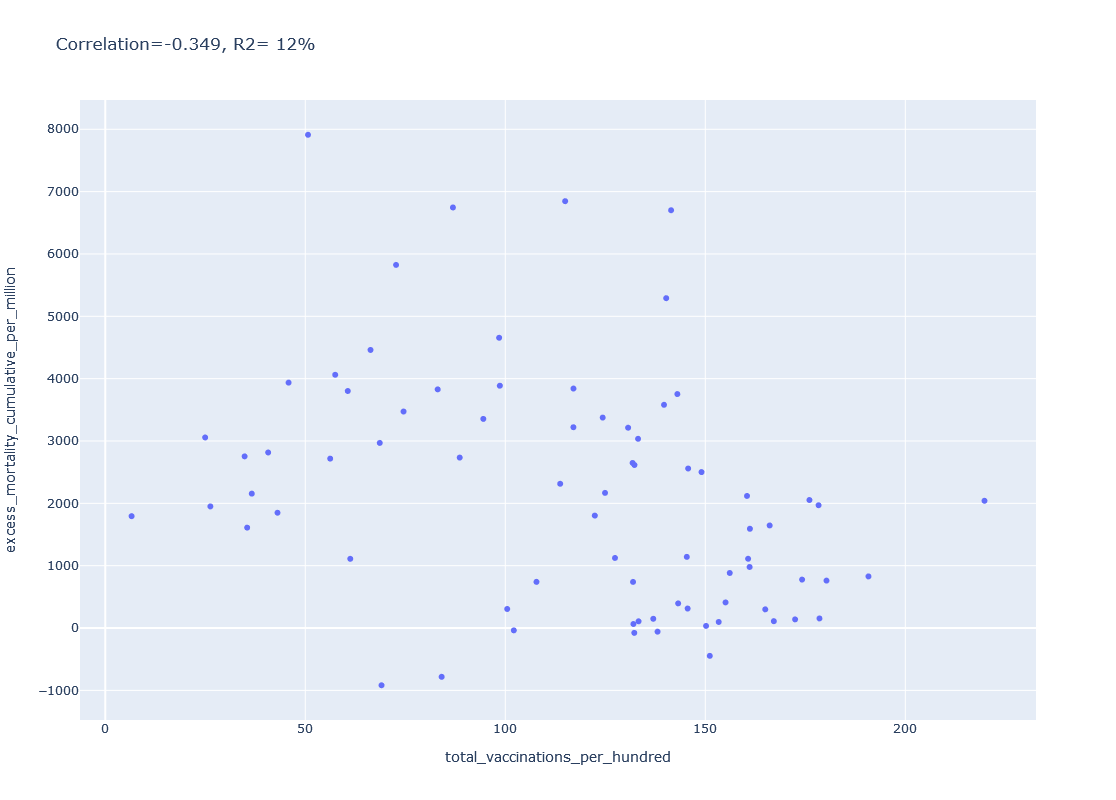

In [114]:
corr_val=df_max[['excess_mortality_cumulative_per_million','total_vaccinations_per_hundred']].corr().unstack().iloc[1]

reg = linear_model.LinearRegression()
model = reg.fit(df_max['total_vaccinations_per_hundred'].values.reshape(-1, 1), df_max['excess_mortality_cumulative_per_million'].values.reshape(-1, 1))
r2=reg.score(df_max['total_vaccinations_per_hundred'].values.reshape(-1, 1), df_max['excess_mortality_cumulative_per_million'].values.reshape(-1, 1))

fig = px.scatter(df_max,    
              x='total_vaccinations_per_hundred',
              y='excess_mortality_cumulative_per_million', 
              width=800,
              height=800,
              title="Correlation={: 1.3f}, R2={: 1.0f}%".format(corr_val,r2*100),
             )
fig.show()

It is obvious from the chart that there is probably no linear relationship present for these two variables. The Coefficient of Determination (R^2) of 0.12 says that a linear model would explain 12% of the variance for a dependent variable.

 ## Bubble Chart 
 country size and max excess_mortality_cumulative_per_million and max total_vaccinations_per_hundred (max values per country).

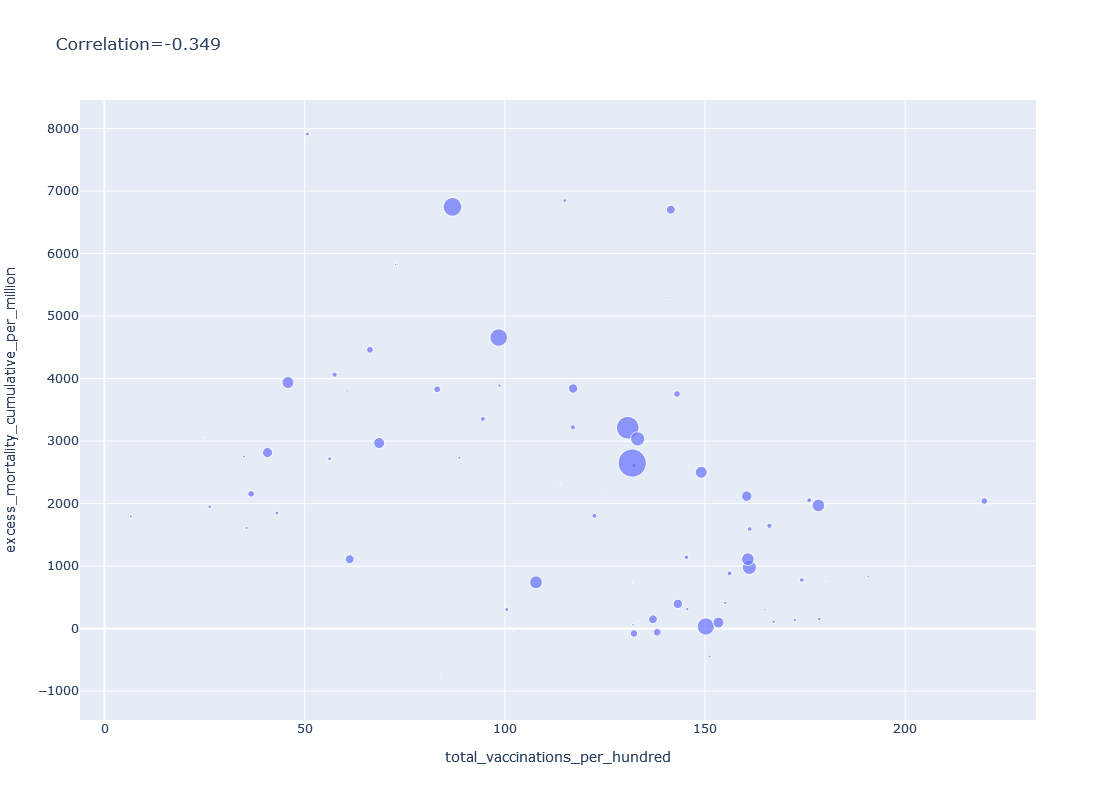

In [95]:
corr_val=df_max[['excess_mortality_cumulative_per_million','total_vaccinations_per_hundred']].corr().unstack().iloc[1]
fig = px.scatter(df_max,    
              x='total_vaccinations_per_hundred',
              y='excess_mortality_cumulative_per_million', 
              size='population',
              width=800,
              height=800,
              title="Correlation={: 1.3f}".format(corr_val),
             )
fig.show()

## Bubble Chart Country Size <= 10M

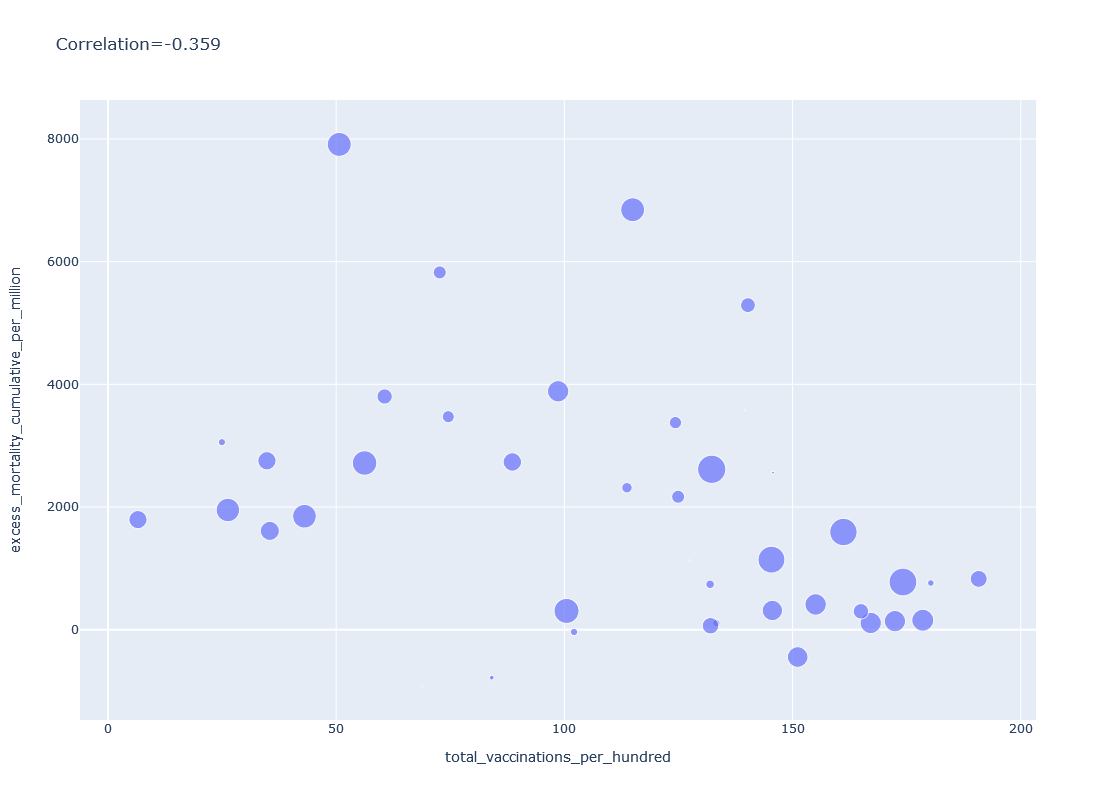

In [96]:
corr_val=df_max.loc[df_max['population']<=10000000,['excess_mortality_cumulative_per_million','total_vaccinations_per_hundred']].corr().unstack().iloc[1]
fig = px.scatter(df_max.loc[df_max['population']<=10000000],    
              x='total_vaccinations_per_hundred',
              y='excess_mortality_cumulative_per_million', 
              size='population',
              width=800,
              height=800,
              title="Correlation={: 1.3f}".format(corr_val),
             )
fig.show()

## Bubble Chart Country Size > 10M

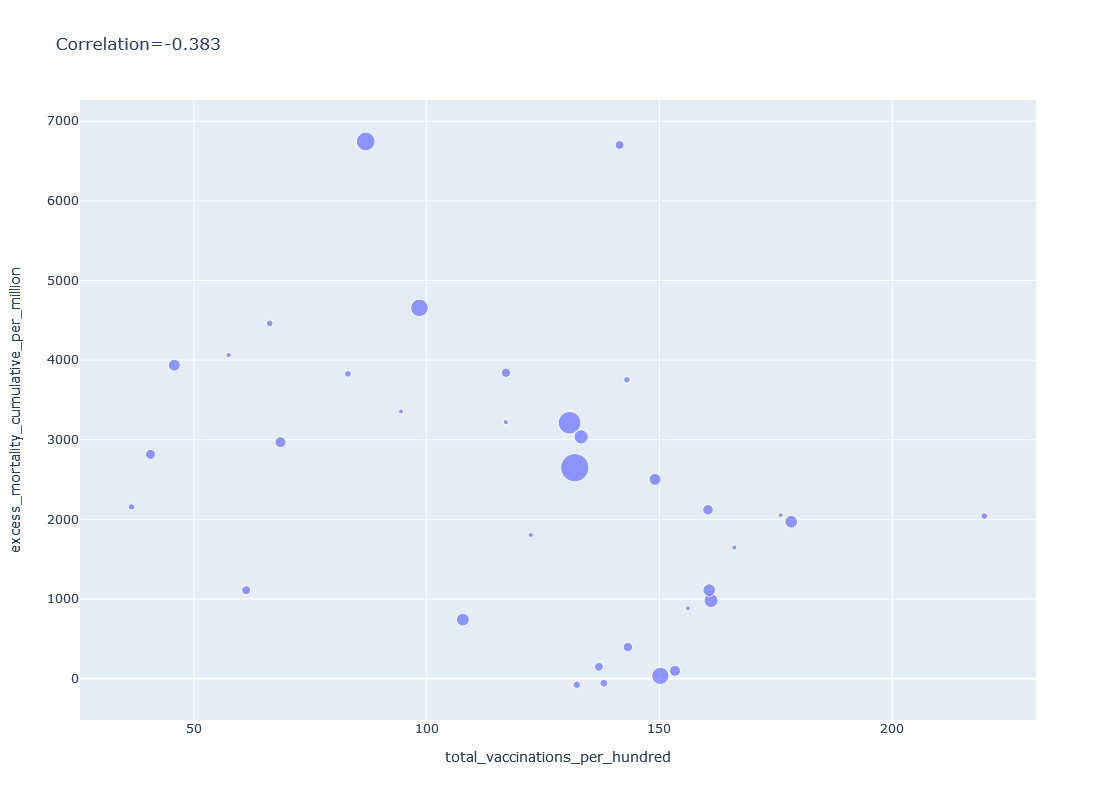

In [105]:
corr_val=df_max.loc[df_max['population']>10000000,['excess_mortality_cumulative_per_million','total_vaccinations_per_hundred']].corr().unstack().iloc[1]
fig = px.scatter(df_max.loc[df_max['population']>10000000],    
              x='total_vaccinations_per_hundred',
              y='excess_mortality_cumulative_per_million', 
              size='population',
              width=800,
              height=800,
              title="Correlation={: 1.3f}".format(corr_val),
             )
fig.show()

In [108]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
model = reg.fit(df_max['total_vaccinations_per_hundred'].values.reshape(-1, 1), df_max['excess_mortality_cumulative_per_million'].values.reshape(-1, 1))
reg.score(df_max['total_vaccinations_per_hundred'].values.reshape(-1, 1), df_max['excess_mortality_cumulative_per_million'].values.reshape(-1, 1))

0.12147859386041537